Universidade Federal do Sul e Sudeste do Pará
Faculdade de Computação e Engenharia Elétrica
Inteligência Artificial – Prof. Dr. Elton Alves
Atividade Avaliativa 2 – Aplicação de Fuzzy com Phyton


# Desenvolva uma aplicação Fuzzy para um exemplo (falta escolher exemplo)

---

**Antecedentes (entradas)**

Superfície: qual o nível de dificuldade da superfície, em uma escala de 0 a 5?
- fácil, moderada, difícil 

Sujeira: qual a quantidade de sujeira, em uma escala de 0 a 5?
- leve, moderada, pesada

---

**Consequente (saída)**

Sucção: qual o nível de sucção que o aspirador de pó deve ser configurado, entre 0% e 10%?
- baixa, média, alta

---

Regras
- Se a superfície for fácil e a sujeira for leve então a sucção será baixa
- Se a superfície for moderada e a sujeira for leve então a sucção será média
- Se a superfície for difícil ou a sujeira for pesada então a sucção será alta
- Se a superfície for moderada então a sucção será média

## Instalação e importação das bibliotecas

In [ ]:
!pip install scikit-fuzzy
#!pip install scikit-fuzzy == 0.4.2

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=06907d42becfe91d496ebeea3357dfc8924ec064e2287fa04f6d4b6464340af4
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##**Antecedentes e consequente**

In [ ]:
np.arange(0, 6, 1)

array([0, 1, 2, 3, 4, 5])

In [ ]:
dificuldade_da_superficie = ctrl.Antecedent(np.arange(0, 6, 1), 'dificuldade')
quantidade_de_sujeira = ctrl.Antecedent(np.arange(0, 6, 1), 'quantidade')

In [ ]:
dificuldade_da_superficie

Antecedent: dificuldade

In [ ]:
dificuldade_da_superficie.universe

array([0, 1, 2, 3, 4, 5])

In [ ]:
nivel_de_succao = ctrl.Consequent(np.arange(0, 11, 1), 'succao')

##**Membership functions**

In [ ]:
dificuldade_da_superficie.automf(number = 3, names = ['facil', 'moderada', 'dificil'])
quantidade_de_sujeira.automf(number = 3, names = ['leve', 'moderada', 'pesada'])

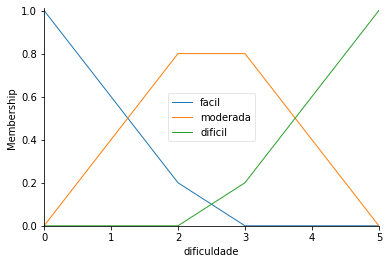

In [ ]:
dificuldade_da_superficie.view()

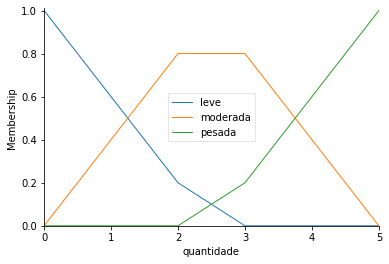

In [ ]:
quantidade_de_sujeira.view()

In [ ]:
nivel_de_succao.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# função triangular
nivel_de_succao['baixa'] = fuzz.trimf(nivel_de_succao.universe, [0, 0, 5])
nivel_de_succao['media'] = fuzz.trimf(nivel_de_succao.universe, [0, 5, 10])
nivel_de_succao['alta'] = fuzz.trimf(nivel_de_succao.universe, [5, 10, 10])

In [ ]:
regra1 = ctrl.Rule(dificuldade_da_superficie['facil'] & quantidade_de_sujeira['leve'], nivel_de_succao['baixa'])
regra2 = ctrl.Rule(dificuldade_da_superficie['moderada'] & quantidade_de_sujeira['leve'], nivel_de_succao['media'])
regra3 = ctrl.Rule(dificuldade_da_superficie['dificil'] | quantidade_de_sujeira['pesada'], nivel_de_succao['alta'])
regra4 = ctrl.Rule(dificuldade_da_superficie['moderada'], nivel_de_succao['alta'])

##Sistema de Controle

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['dificuldade'] = 7
sistema.input['quantidade'] = 1
sistema.compute()

8.333333333333334


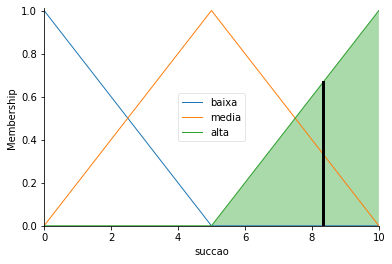

In [ ]:
print(sistema.output['succao'])
nivel_de_succao.view(sim = sistema)

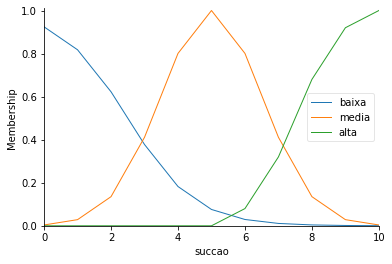

In [ ]:
nivel_de_succao['baixa'] = fuzz.sigmf(nivel_de_succao.universe, 2.5, -1)
nivel_de_succao['media'] = fuzz.gaussmf(nivel_de_succao.universe, 5, 1.5)
nivel_de_succao['alta'] = fuzz.pimf(nivel_de_succao.universe, 5, 10, 10, 11)
nivel_de_succao.view()

https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html#skfuzzy.sigmf

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#skfuzzy.pimf

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.membership.html#skfuzzy.membership.gaussmf

